<a href="https://colab.research.google.com/github/bd-hedstrom/food-sales-predictions_Hedstrom/blob/main/PROJECT_Sales_Predictions_Hedstrom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
filename = '/content/sales_predictions.csv'
raw_sales_data = pd.read_csv(filename)
raw_sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
#Part II 
#1.)How many rows and columns?
# Answer: 12 columns, 8523 rows
raw_sales_data.shape




(8523, 12)

In [20]:
#2.)What are the datatypes of each variable?
# Answer: object, float64, int64
raw_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
#3.)Are there duplicates? If so, drop any duplicates.
# Answer: There were seemingly no duplicates as the row count didnt change.
raw_sales_data = raw_sales_data.drop_duplicates()
print(raw_sales_data)

     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]


In [22]:
#4.) Identify missing values.
#Outlet_Size and Item_Weight are missing values as the non-null value for both 
# were below 8523 compared to the other values.
average_weight = raw_sales_data['Item_Weight'].mean()
raw_sales_data['Item_Weight'] = raw_sales_data['Item_Weight'].fillna(average_weight)

#5.) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
# Average weight to fill in the missing data wont skew the aggregate item weight low or high
raw_sales_data['Outlet_Size'] = raw_sales_data['Outlet_Size'].fillna('Medium')
# Medium is a safe bet to assume as its between High and Low
print(raw_sales_data)

#6.) Confirm that there are no missing values after addressing them.
#Answer: The number of non-nulls is now consistent for each column
raw_sales_data.isna().sum()

     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
#.7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
raw_sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [24]:
#I was able to rename the redundant values (LF, low fat, reg) and put them under a uniform category
raw_sales_data = raw_sales_data.replace({'LF':'Low Fat','low fat' : 'Low Fat','reg':'Regular'})

In [25]:
#8.) For any numerical columns, obtain the summary statistics of each (min, max, mean)

print('Item_Weight Stats:')
print('Mean', raw_sales_data['Item_Weight'].mean())
print('Max', raw_sales_data['Item_Weight'].max())
print('Min', raw_sales_data['Item_Weight'].min())

print('Item_Visibility Stats:')
print('Mean',raw_sales_data['Item_Visibility'].mean())
print('Max', raw_sales_data['Item_Visibility'].max())
print('Min', raw_sales_data['Item_Visibility'].min())

print('Item_MRP Stats:')
print('Mean',raw_sales_data['Item_MRP'].mean())
print('Max', raw_sales_data['Item_MRP'].max())
print('Min', raw_sales_data['Item_MRP'].min())

print('Outlet_Establishment_Year Stats:')
print('Mean',raw_sales_data['Outlet_Establishment_Year'].mean())
print('Max', raw_sales_data['Outlet_Establishment_Year'].max())
print('Min', raw_sales_data['Outlet_Establishment_Year'].min())

print('Item_Outlet_Sales Stats:')
print('Mean',raw_sales_data['Item_Outlet_Sales'].mean())
print('Max', raw_sales_data['Item_Outlet_Sales'].max())
print('Min', raw_sales_data['Item_Outlet_Sales'].min())

Item_Weight Stats:
Mean 12.857645184136409
Max 21.35
Min 4.555
Item_Visibility Stats:
Mean 0.06613202877895127
Max 0.328390948
Min 0.0
Item_MRP Stats:
Mean 140.9927819781768
Max 266.8884
Min 31.29
Outlet_Establishment_Year Stats:
Mean 1997.8318667135984
Max 2009
Min 1985
Item_Outlet_Sales Stats:
Mean 2181.2889135750365
Max 13086.9648
Min 33.29


In [26]:
raw_sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


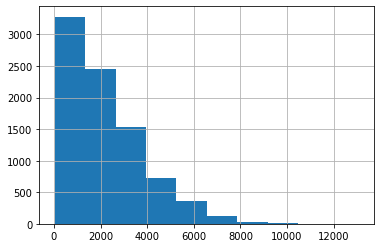

In [27]:
raw_sales_data['Item_Outlet_Sales'].hist();

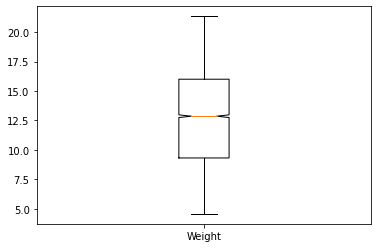

In [29]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot([raw_sales_data['Item_Weight']], notch = True, labels=['Weight']);


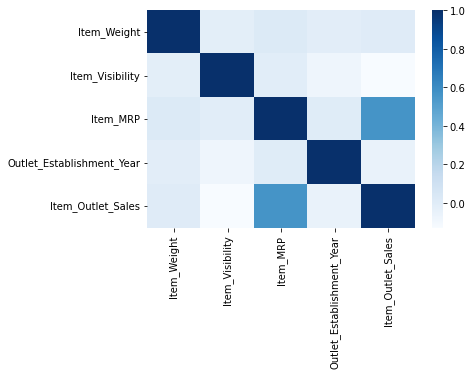

In [30]:
corr = raw_sales_data.corr()
sns.heatmap(corr,cmap='Blues');